In [2]:
#Importando as bibliotecas
import cv2
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

In [3]:
img1 = cv2.imread(DATA_PATH + "\\images\\book.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(DATA_PATH + "\\images\\book_scene.jpeg", cv2.IMREAD_GRAYSCALE)

In [5]:
ORB = cv2.ORB_create()

keyp1, des1 = ORB.detectAndCompute(img1, None)
keyp2, des2 = ORB.detectAndCompute(img2, None)

## Brute Force

In [10]:
BFMat = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = BFMat.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

matches = matches[:11]

In [11]:
img3 = cv2.drawMatches(img1, keyp1, img2, keyp2,
                       matches, None,
                       flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

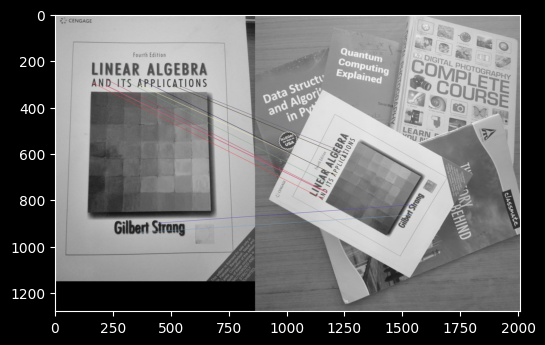

In [12]:
plt.imshow(img3)
plt.show()

matcher object -> distance, trainIdx, queryIdx, imgIdx

## Descriptor Matcher

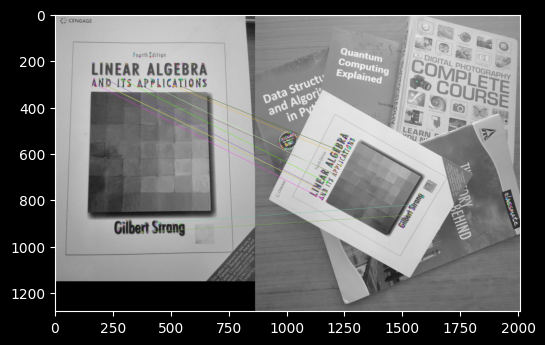

In [15]:
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)

matches = matcher.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

matches = matches[:11]

img3 =cv2.drawMatches(img1, keyp1, img2, keyp2, matches, None)

plt.imshow(img3)
plt.show()

## FLANN Matcher

In [16]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(check = 50)

In [17]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [18]:
matches = flann.knnMatch(np.float32(des1), np.float32(des2), k=2)

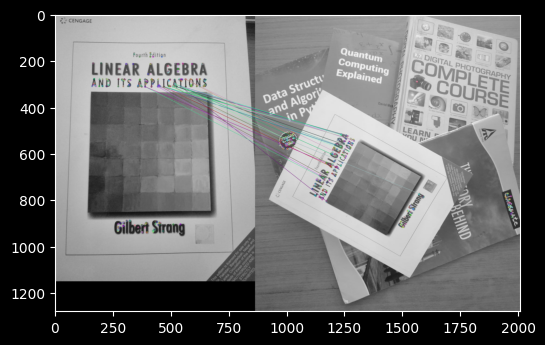

In [20]:
matchesMask = [[0,0] for i in range(len(matches))]


#ratio test
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1,0]

matches = matches[:11]

draw_params = dict(matchColor = (0, 255, 0),
                   singlePointColor = (255, 0, 0),
                   matchesMask = matchesMask,
                   flags = cv2.DRAW_MATCHES_FLAGS_DEFAULT)

img3 = cv2.drawMatchesKnn(img1, keyp1, img2, keyp2, matches, None)

plt.imshow(img3)
plt.show()

https://docs.opencv.org/4.1.0/dc/dc3/tutorial_py_matcher.html
https://www.youtube.com/watch?v=Fe-KWKPk9Zc